# Matrix Based Factorization

Matrix Factorization is a class of Collaborative Filtering used in the Recommendation System. When the features of the user or items are unknown, it becomes difficult to build a recommendation model. In such cases, the most common practice is to generate embeddings, which is another name for latent factors, and let the model determine the weights of these embedding using Singular Value Decomposition (SVD).<br><br>
Usually the matrix factorization approach used in Recommendation system follows the probabilistic methodologies such as posterior inferences and traditional optimization techniques to minimize the loss between the matrix obtained by dot product and actual matrix. In our case, to minimize this loss function we have used Stochastic Gradient Descent. We have built and trained our neural network using Fast AI library. <br><br>
In a nutshell, matrix factorization works by disintegrating the user-item interaction matrix into the product of two lower dimensionality rectangular matrices


In [1]:
import numpy as np
import pandas as pd

from fastai.basic_train import Learner as learner
from fastai.collab import *
from fastai.metrics import accuracy, root_mean_squared_error

In [2]:
ratings = pd.read_csv('data/ratings.csv')

In [3]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
data = CollabDataBunch.from_df(ratings, seed=12, valid_pct=0.1, user_name='user_id', item_name='book_id', rating_name='rating')

In [5]:
data.show_batch()

user_id,book_id,target
33037,3376,3.0
24028,1807,5.0
8918,4550,5.0
22883,2388,5.0
23172,2374,4.0


In [6]:
learn = collab_learner(data, use_nn=True, emb_szs={'user_id': 6, 'book_id':6}, layers=[256, 128], y_range=(1, 5))

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


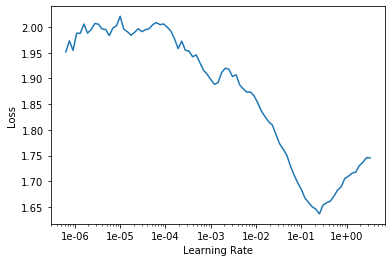

In [7]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.metrics = [root_mean_squared_error]

In [18]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.788592,0.784244,0.881447,06:04
1,0.726719,0.749546,0.860968,05:51
2,0.713743,0.721351,0.844523,06:04
3,0.705317,0.705376,0.835038,05:52
4,0.620756,0.704119,0.834092,05:54


In [19]:
learn.show_results()

user_id,book_id,target,prediction
3960,2239,5.0,[3.470974]
16476,3743,3.0,[3.61816]
34772,4752,5.0,[4.465668]
10471,3864,1.0,[3.003389]
7812,2606,4.0,[4.128022]
